In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
import os
os.getcwd()

'/Users/FBINSATTER'

In [3]:
os.chdir("./Desktop/ChRCC- paper 2/ChRCC-2")

In [4]:
os.listdir()

['.Rhistory',
 'decistion_tree.log',
 '2ndScore.csv',
 '.DS_Store',
 'tidymodels_SVM.R',
 'postLyo_conc.csv',
 'boxplot and stuff for nanodata.R',
 'Khaled_NanoStringRNA_PostLyoph_012722A.xlsx',
 'SupervisedUmap.R',
 'GLM-Result.csv',
 'NanoString_Cutpoints.csv',
 'Median Of Ratios.R',
 'pathology review.R',
 '.RData',
 'trainData.csv',
 'chRCC_decision_tree_graphivz.png',
 'chRCC_decision_tree_graphivz',
 'DataPreprocess.Rdata',
 'ChRCC-2.Rproj',
 'RCCs',
 'decistion_tree.png',
 'Alluvial and Comparison plots.R',
 'Supervised_Models.csv',
 'Caret_GLMnet.R',
 '.Rproj.user',
 'power analysis.R',
 'Caret_RF models.R',
 'Supervisedmodel.Rdata']

In [5]:
import pandas as pd
df = pd.read_csv('trainData.csv')

In [6]:
df.head()

,Unnamed: 0,Histology2,AP1M2,AQP6,ATP2C1,BSPRY,CLDN8,WDR63,ELMO3,ESRP1,...,NDUFS1,PLCL1,PLCL2,PNPT1,PRDX3,RSPO3,S100A1,SOCS1,SPINT2,SUCLA2
0,GSM499330,chRCC,9.557646,6.787965,8.314712,8.122352,11.859985,4.785813,8.522337,8.676067,...,8.841702,8.187986,9.111307,7.950351,10.171800,8.388740,7.942931,8.252476,11.215257,9.087933
1,GSM499331,chRCC,9.317580,5.846685,8.835085,8.380882,11.272681,4.497311,8.245883,9.108097,...,8.457578,7.313633,9.081216,7.500784,10.306167,7.831949,7.886092,8.216357,10.981290,8.425753
2,GSM499332,chRCC,9.178900,9.860998,7.821455,8.174391,10.029445,5.618647,8.330104,8.615073,...,8.821408,9.010311,7.805359,8.143207,10.644657,6.858271,9.134684,7.718763,10.558856,9.044501
3,GSM499333,chRCC,9.488390,6.238332,8.329933,8.279146,11.556392,4.877136,8.108799,9.055720,...,8.838678,7.932179,8.778066,7.711554,10.225286,8.192301,7.979124,8.748934,11.525866,9.479337
4,GSM499334,chRCC,9.401908,6.348332,7.991422,8.231814,10.673081,4.926323,8.825680,8.003248,...,8.221531,7.876739,7.570949,8.168842,9.669567,6.803648,8.289802,7.238449,10.560929,8.528361


In [7]:
X = df.iloc[:, 2:32]

In [8]:
X.head()

,AP1M2,AQP6,ATP2C1,BSPRY,CLDN8,WDR63,ELMO3,ESRP1,HOOK2,ITGB3,...,NDUFS1,PLCL1,PLCL2,PNPT1,PRDX3,RSPO3,S100A1,SOCS1,SPINT2,SUCLA2
0,9.557646,6.787965,8.314712,8.122352,11.859985,4.785813,8.522337,8.676067,9.992500,6.114474,...,8.841702,8.187986,9.111307,7.950351,10.171800,8.388740,7.942931,8.252476,11.215257,9.087933
1,9.317580,5.846685,8.835085,8.380882,11.272681,4.497311,8.245883,9.108097,9.678651,6.112586,...,8.457578,7.313633,9.081216,7.500784,10.306167,7.831949,7.886092,8.216357,10.981290,8.425753
2,9.178900,9.860998,7.821455,8.174391,10.029445,5.618647,8.330104,8.615073,9.798713,6.488131,...,8.821408,9.010311,7.805359,8.143207,10.644657,6.858271,9.134684,7.718763,10.558856,9.044501
3,9.488390,6.238332,8.329933,8.279146,11.556392,4.877136,8.108799,9.055720,10.041718,5.958098,...,8.838678,7.932179,8.778066,7.711554,10.225286,8.192301,7.979124,8.748934,11.525866,9.479337
4,9.401908,6.348332,7.991422,8.231814,10.673081,4.926323,8.825680,8.003248,9.935366,6.202363,...,8.221531,7.876739,7.570949,8.168842,9.669567,6.803648,8.289802,7.238449,10.560929,8.528361


In [10]:
y = df["Histology2"].replace(['chRCC', 'Oncocytoma'], [0,1])
y

0     0
1     0
2     0
3     0
4     0
     ..
84    1
85    1
86    1
87    1
88    1
Name: Histology2, Length: 89, dtype: int64

In [11]:
clf = DecisionTreeClassifier(random_state=125)
model = clf.fit(X, y)

In [12]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_11 <= 9.13
|   |--- class: 0
|--- feature_11 >  9.13
|   |--- class: 1



In [13]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

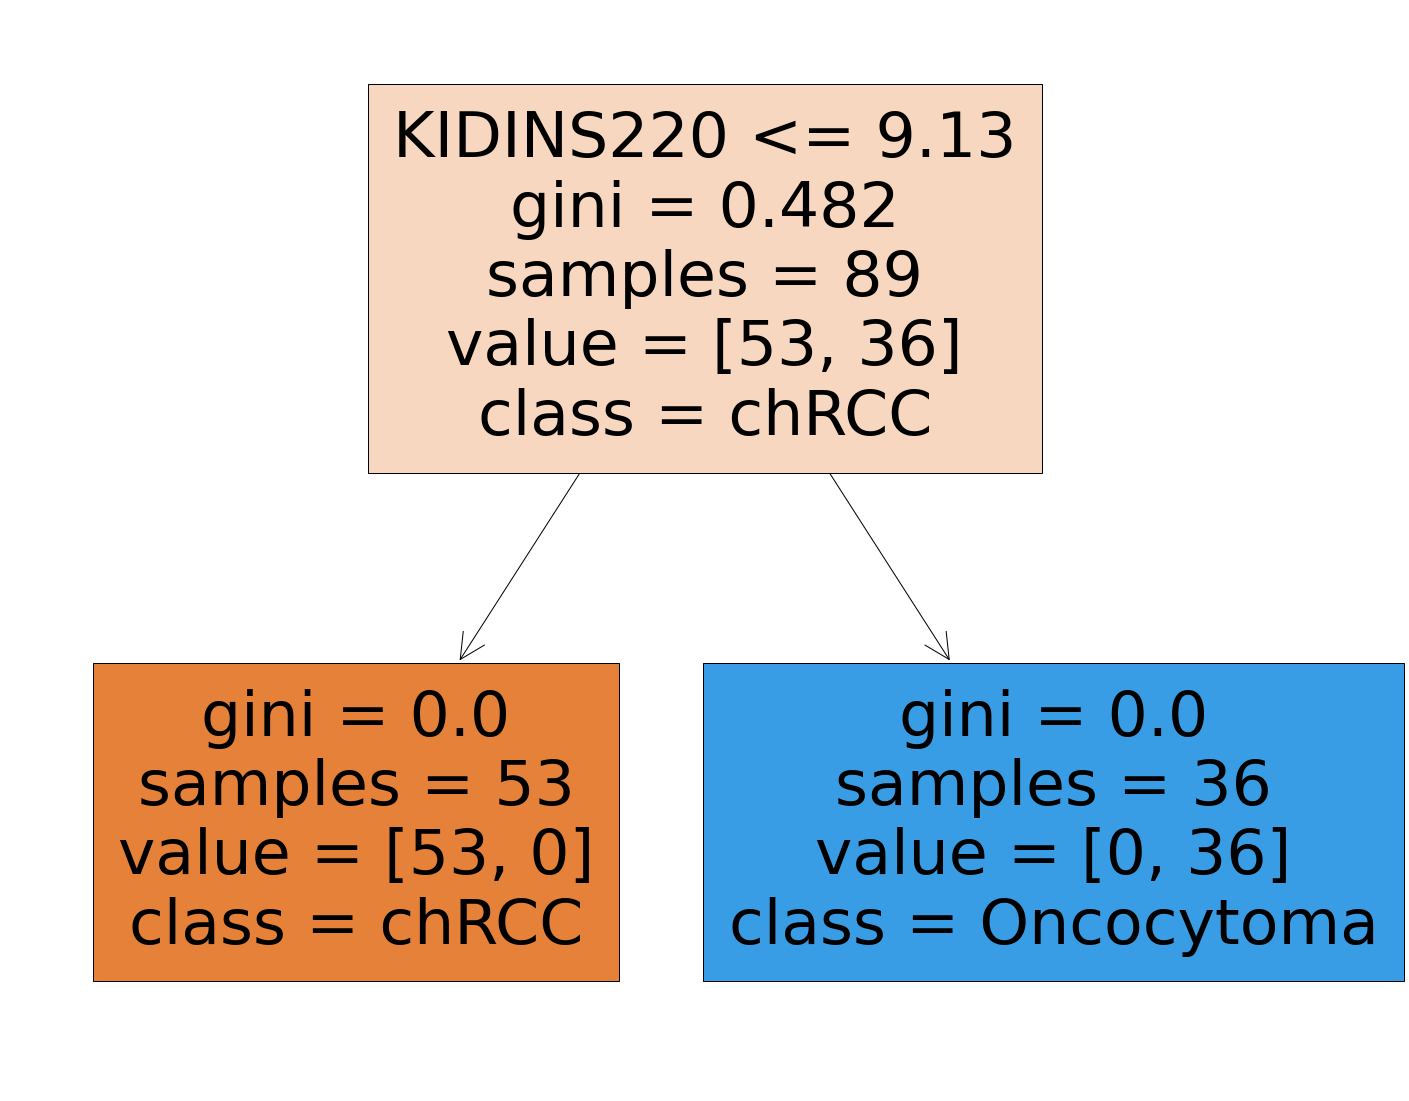

In [14]:
fig = plt.figure(figsize=(25,20))
genes = df.columns[2:32]
_ = tree.plot_tree(clf, 
                   feature_names= genes,  
                   class_names=['chRCC', 'Oncocytoma'],
                   filled=True)

In [15]:
fig.savefig("decistion_tree.png")

In [16]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=genes,  
                                class_names=['chRCC', 'RO'],
                                filled=True)

In [17]:
graph = graphviz.Source(dot_data, format="png") 
graph
graph.render("chRCC_decision_tree_graphivz")

'chRCC_decision_tree_graphivz.png'

In [21]:
from dtreeviz.trees import dtreeviz # remember to load the package

In [24]:
genes

Index(['AP1M2', 'AQP6', 'ATP2C1', 'BSPRY', 'CLDN8', 'WDR63', 'ELMO3', 'ESRP1',
       'HOOK2', 'ITGB3', 'KCNG3', 'KIDINS220', 'KRT7', 'LAMA1', 'LIMS1',
       'LRFN5', 'LSR', 'MANEA', 'MAP4K3', 'MSH2', 'NDUFS1', 'PLCL1', 'PLCL2',
       'PNPT1', 'PRDX3', 'RSPO3', 'S100A1', 'SOCS1', 'SPINT2', 'SUCLA2'],
      dtype='object')

In [27]:
viz = dtreeviz(clf, X, y,
                target_name="Histology",
                feature_names=X.columns,
                class_names=['chRCC', 'Oncocytoma'])
viz.view()

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
viz.save("chRCC-DecisionTree.svg")